In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../scripts")
import models
import pickle
from Bio import SeqIO
#import main

## Test `InteractionMatrix`

In [10]:
file = open("../data/normalized/GM12878_5k/loops_0.pickle", "rb")

In [11]:
matrices = []
for i in range(12):
    identifier, test_item = pickle.load(file)
    matrix = models.InteractionMatrix(identifier, test_item)
    matrices.append(matrix)

data for 101255000,101400000 not found in interaction matrix (101400000,101255000)
data for 101255000,101401000 not found in interaction matrix (101400000,101255000)
data for 101255000,101402000 not found in interaction matrix (101400000,101255000)
data for 101255000,101403000 not found in interaction matrix (101400000,101255000)
data for 101255000,101404000 not found in interaction matrix (101400000,101255000)
data for 101256000,101400000 not found in interaction matrix (101400000,101255000)
data for 101256000,101401000 not found in interaction matrix (101400000,101255000)
data for 101256000,101402000 not found in interaction matrix (101400000,101255000)
data for 101256000,101403000 not found in interaction matrix (101400000,101255000)
data for 101256000,101404000 not found in interaction matrix (101400000,101255000)
data for 101257000,101400000 not found in interaction matrix (101400000,101255000)
data for 101257000,101401000 not found in interaction matrix (101400000,101255000)
data

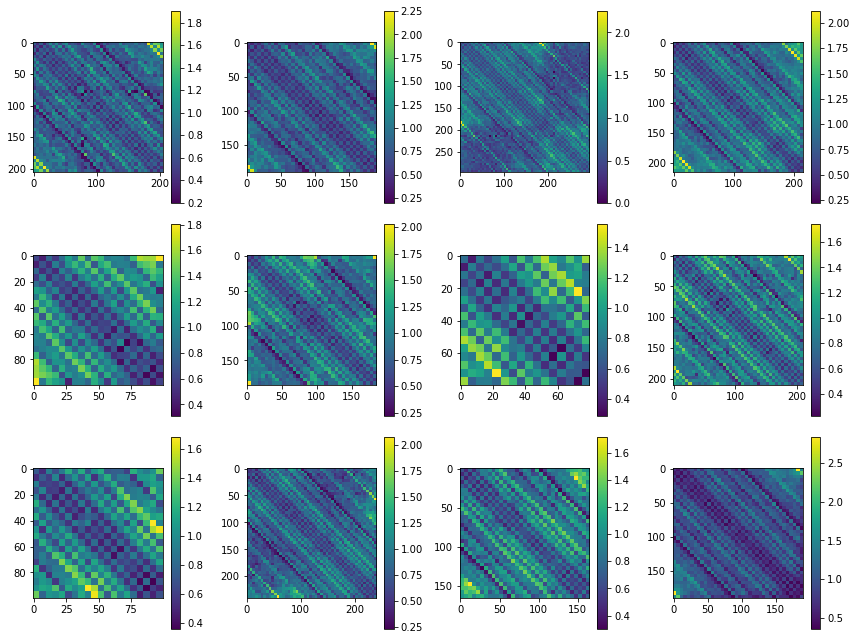

In [12]:
resolution = 1000

plt.figure(figsize=(12, 9))
for i, matrix in enumerate(matrices):
    plt.subplot(3, 4, i + 1)
    r = matrix.range()
    interpolated = np.zeros(((r[1] - r[0]) // resolution, (r[1] - r[0]) // resolution))
    for x in range(interpolated.shape[0]):
        for y in range(interpolated.shape[1]):
            interpolated[x,y] = matrix.raw_value_at(x * resolution + r[0], y * resolution + r[0])

    plt.imshow(np.log(1 + interpolated))
    plt.colorbar()
plt.tight_layout()
plt.show()

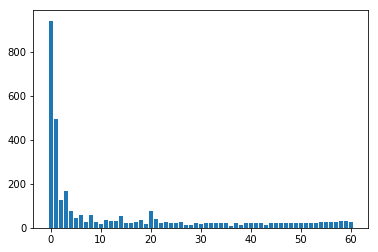

In [15]:
medians = {0: 941.3474193665713, 5000: 493.0858871872356, 10000: 126.36195771658488, 15000: 167.7244629063222, 20000: 75.29886471176974, 25000: 42.3812214846306, 30000: 57.848861839906256, 35000: 27.90180360630761, 40000: 58.68811011889896, 45000: 26.918996538973097, 50000: 18.240063855862065, 55000: 36.644615796455454, 60000: 31.999100696345668, 65000: 30.819401914507907, 70000: 52.605120572073844, 75000: 21.959624072582518, 80000: 21.468353422733852, 85000: 25.319224128687605, 90000: 34.62823496841101, 95000: 15.453093363140997, 100000: 74.1085093794134, 105000: 39.46904757595194, 110000: 21.010977002510025, 115000: 25.13965566784844, 120000: 21.82587754108681, 125000: 23.11771038774317, 130000: 24.270331817474165, 135000: 11.564174682322781, 140000: 13.844668844157411, 145000: 20.384849083058835, 150000: 17.941429721030758, 155000: 20.934715485006297, 160000: 21.295340224272465, 165000: 21.77943749312082, 170000: 21.460581681721017, 175000: 21.20063538984578, 180000: 6.853914589277627, 185000: 19.75080183394136, 190000: 12.539214633459645, 195000: 20.583941840159625, 200000: 20.45279945047873, 205000: 20.256224852816896, 210000: 20.399007676640544, 215000: 11.511333002935167, 220000: 20.20522167871616, 225000: 20.26917617486594, 230000: 20.574095188922257, 235000: 20.422615580054895, 240000: 20.692339154776427, 245000: 21.17642822992673, 250000: 21.297758577281407, 255000: 21.687173550085998, 260000: 22.33618176691292, 265000: 22.92628558393843, 270000: 24.520618409669545, 275000: 25.35605010829771, 280000: 26.337721150689802, 285000: 27.10262038535548, 290000: 29.732624508710877, 295000: 30.78747749516938, 300000: 25.68330789592081}
medians = sorted(medians.items())
plt.figure()
plt.bar(list(range(len(medians))), [m[1] for m in medians])
plt.show()

In [13]:
start, stop = matrices[2].range()
print((stop - start) // matrices[2].resolution)

59


### Test out bivariate interpolation (11/27/18)

In [14]:
from scipy import interpolate
interp_resolution = 500

In [15]:
matrix = matrices[2]
r = matrix.range()

In [16]:
# Produce x, y, z
loci = list(matrix.data.items())
loci_x, loci_y = np.meshgrid(np.arange(r[0], r[1], matrix.resolution), np.arange(r[0], r[1], matrix.resolution))
loci_coords = np.hstack([loci_x.reshape(-1, 1), loci_y.reshape(-1, 1)])
loci_values = np.array([matrix.value_at(x, y) for x, y in loci_coords])

In [17]:
indexes = np.arange((r[1] - r[0]) // interp_resolution)
grid_x, grid_y = np.meshgrid(indexes * interp_resolution + r[0], indexes * interp_resolution + r[0])
grid = np.hstack([grid_x.reshape(-1, 1), grid_y.reshape(-1, 1)])

data for 101255000,101400000 not found in interaction matrix (101400000,101255000)
data for 101255000,101400500 not found in interaction matrix (101400000,101255000)
data for 101255000,101401000 not found in interaction matrix (101400000,101255000)
data for 101255000,101401500 not found in interaction matrix (101400000,101255000)
data for 101255000,101402000 not found in interaction matrix (101400000,101255000)
data for 101255000,101402500 not found in interaction matrix (101400000,101255000)
data for 101255000,101403000 not found in interaction matrix (101400000,101255000)
data for 101255000,101403500 not found in interaction matrix (101400000,101255000)
data for 101255000,101404000 not found in interaction matrix (101400000,101255000)
data for 101255000,101404500 not found in interaction matrix (101400000,101255000)
data for 101255500,101400000 not found in interaction matrix (101400000,101255000)
data for 101255500,101400500 not found in interaction matrix (101400000,101255000)
data

data for 101400000,101255000 not found in interaction matrix (101255000,101400000)
data for 101400000,101255500 not found in interaction matrix (101255000,101400000)
data for 101400000,101256000 not found in interaction matrix (101255000,101400000)
data for 101400000,101256500 not found in interaction matrix (101255000,101400000)
data for 101400000,101257000 not found in interaction matrix (101255000,101400000)
data for 101400000,101257500 not found in interaction matrix (101255000,101400000)
data for 101400000,101258000 not found in interaction matrix (101255000,101400000)
data for 101400000,101258500 not found in interaction matrix (101255000,101400000)
data for 101400000,101259000 not found in interaction matrix (101255000,101400000)
data for 101400000,101259500 not found in interaction matrix (101255000,101400000)
data for 101400000,101270000 not found in interaction matrix (101270000,101400000)
data for 101400000,101270500 not found in interaction matrix (101270000,101400000)
data

/Users/venkatesh-sivaraman/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in maximum
  app.launch_new_instance()


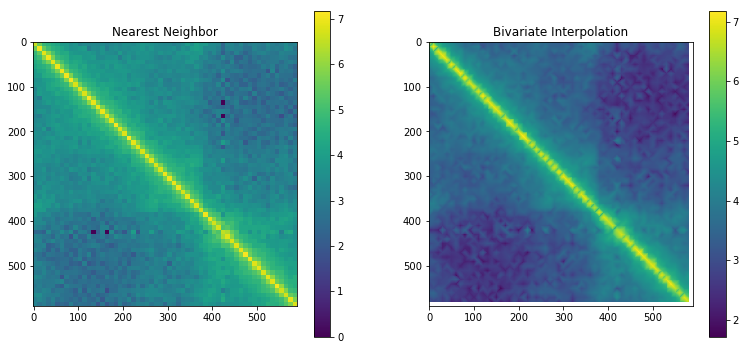

In [18]:
#interp_f = interpolate.griddata(loci_coords, loci_values, method='cubic')
interpolated = interpolate.griddata(loci_coords, loci_values, grid, method='linear')
interpolated = interpolated.reshape((r[1] - r[0]) // interp_resolution, (r[1] - r[0]) // interp_resolution)

nearest = np.zeros(((r[1] - r[0]) // interp_resolution, (r[1] - r[0]) // interp_resolution))
for x in range(nearest.shape[0]):
    for y in range(nearest.shape[1]):
        nearest[x,y] = matrix.raw_value_at(x * interp_resolution + r[0], y * interp_resolution + r[0])

plt.figure(figsize=(13, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.log(1 + np.maximum(0, nearest)))
plt.colorbar()
plt.title("Nearest Neighbor")
plt.subplot(1, 2, 2)
plt.imshow(np.log(1 + np.maximum(0, interpolated)))
plt.colorbar()
plt.title("Bivariate Interpolation")
plt.show()

In [19]:
# Now try to do bilinear interpolation but using only the values that we have
loci_x, loci_y = np.meshgrid(np.arange(r[0], r[1], matrix.resolution), np.arange(r[0], r[1], matrix.resolution))
loci_coords = []
loci_values = []
for x, y in zip(loci_x.ravel(), loci_y.ravel()):
    val = matrix.raw_value_at(x, y)
    if val != 0.0:
        loci_coords.append([x, y])
        loci_values.append(val)
interpolator = interpolate.LinearNDInterpolator(loci_coords, loci_values)

data for 101400000,101255000 not found in interaction matrix (101255000,101400000)
data for 101400000,101270000 not found in interaction matrix (101270000,101400000)
data for 101255000,101400000 not found in interaction matrix (101400000,101255000)
data for 101270000,101400000 not found in interaction matrix (101400000,101270000)


895.0618111012166
(590, 590)


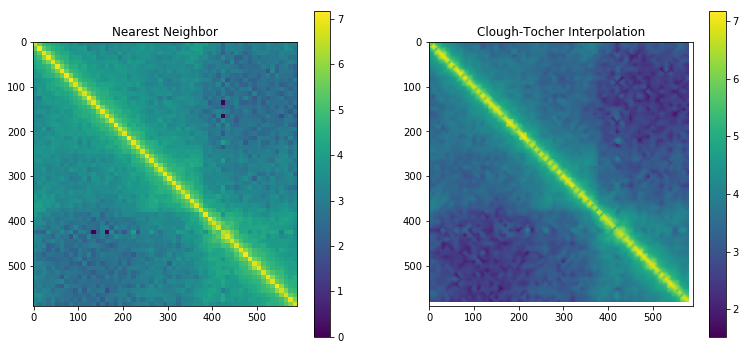

In [27]:
plt.figure(figsize=(13, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.log(1 + np.maximum(0, nearest)))
plt.colorbar()
plt.title("Nearest Neighbor")
plt.subplot(1, 2, 2)
print(interpolator(r[1] - matrix.resolution, r[1] - matrix.resolution))
grid = np.meshgrid(np.arange(r[0], r[1], interp_resolution), np.arange(r[0], r[1], interp_resolution))
print(grid[0].shape)
plt.imshow(np.log(interpolator(*grid)))
plt.colorbar()
plt.title("Clough-Tocher Interpolation")
plt.show()

[[101190000 101190000]
 [101190500 101190000]
 [101191000 101190000]
 ...
 [101479000 101480000]
 [101479500 101480000]
 [101480000 101480000]] (581, 581)


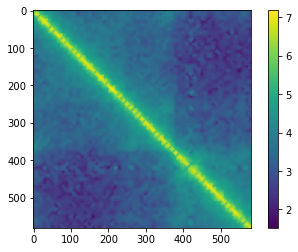

In [29]:
# It's now incorporated into the InteractionMatrix class
grid, dim = matrix.coordinates_grid(interp_resolution)
values = matrix.values_grid(interp_resolution)
print(grid, values.shape)
plt.imshow(np.log(values))
plt.colorbar()

In [21]:
file.close()

## Test `Sequence`

In [117]:
seq_records = SeqIO.parse("../data/loop_sequences_GM12878.fasta", "fasta")

In [118]:
histone_file = open("../data/epigenomic_tracks/GM12878.pickle", "rb")
histone_mods = []
for i, record in enumerate(seq_records):
    identifier, h_mods = pickle.load(histone_file)
    histone_mods.append(models.Sequence(identifier, str(record.seq), h_mods))
    if i == 12:
        break

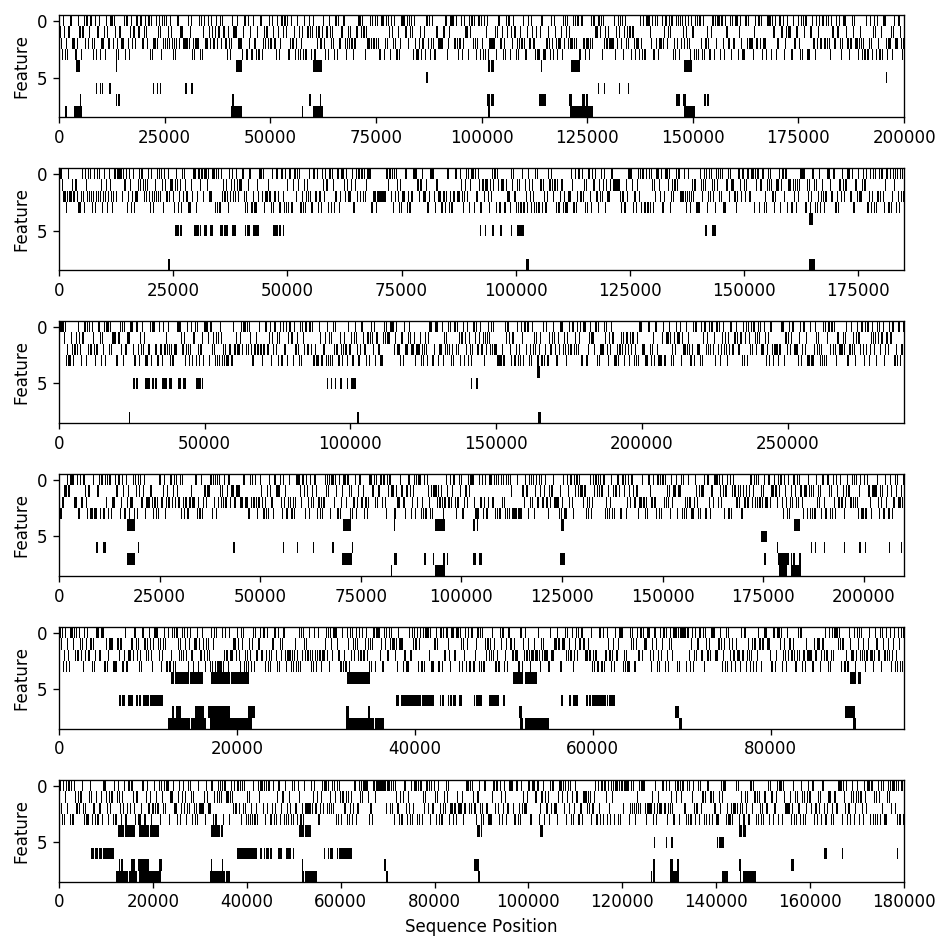

In [122]:
plt.figure(figsize=(8, 8), dpi=120)
for i in range(6):
    plt.subplot(6, 1, i + 1)
    mat = histone_mods[i].to_array() # Produces numpy arrays where each column is a feature vector
    plt.imshow(mat, cmap='Greys', aspect='auto')
    plt.ylabel("Feature")
    
plt.xlabel("Sequence Position")
plt.tight_layout()
plt.show()

## 11/30: Test interaction matrix ML estimate

In [27]:
from main import estimate_pairwise_interactions
from update_state_assignments import state_asg, normalized_diff

In [28]:
states = state_asg(matrices[2], np.array([[7, 2], [2, 7]]), normalized_diff, 1000)

In [41]:
R = estimate_pairwise_interactions([(None, matrices[2])], [(0, len(states))], states, 2, 1000)
R

array([[4.42371523, 3.2419382 ],
       [3.23967011, 3.80364487]])

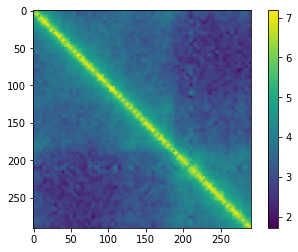

In [42]:
vals = np.log(1 + matrices[2].values_grid(1000))
plt.imshow(vals)
plt.colorbar()

In [37]:
states

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0])

In [36]:
np.mean(vals[:150,200:250])

2.839612114803847